In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)

In [16]:
df_7 = pd.read_csv('/Users/keon/Desktop/walmart2/dtxwalmart/store_7.csv')
df_7.head(10)

,Location ID,Tonnage,Completed Date,Zip code,State,Latitude,Longitude,Days Since Last Pickup,Last Pickup Tonnage,Second Last Pickup Tonnage,Third Last Pickup Tonnage,Weekdays Since Last Pickup,Weekend Days Since Last Pickup,Days Before Last Pickup,Days Before Second Last Pickup,Days Before Third Last Pickup,Month
0,7,9.24,2021-02-04,72120.0,AR,34.838869,-92.236771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,7,11.89,2021-02-22,72120.0,AR,34.838869,-92.236771,18.0,9.24,NaN,NaN,12.0,9.0,NaN,NaN,NaN,2
2,7,3.49,2021-02-25,72120.0,AR,34.838869,-92.236771,3.0,11.89,9.24,NaN,3.0,0.0,18.0,NaN,NaN,2
3,7,8.31,2021-03-08,72120.0,AR,34.838869,-92.236771,11.0,3.49,11.89,9.24,7.0,6.0,3.0,18.0,NaN,3
4,7,9.96,2021-03-18,72120.0,AR,34.838869,-92.236771,10.0,8.31,3.49,11.89,8.0,3.0,11.0,3.0,18.0,3
5,7,11.44,2021-03-29,72120.0,AR,34.838869,-92.236771,11.0,9.96,8.31,3.49,7.0,6.0,10.0,11.0,3.0,3
6,7,2.76,2021-04-08,72120.0,AR,34.838869,-92.236771,10.0,11.44,9.96,8.31,8.0,3.0,11.0,10.0,11.0,4
7,7,14.33,2021-04-13,72120.0,AR,34.838869,-92.236771,5.0,2.76,11.44,9.96,3.0,3.0,10.0,11.0,10.0,4
8,7,6.49,2021-04-19,72120.0,AR,34.838869,-92.236771,6.0,14.33,2.76,11.44,4.0,3.0,5.0,10.0,11.0,4
9,7,8.79,2021-04-28,72120.0,AR,34.838869,-92.236771,9.0,6.49,14.33,2.76,7.0,3.0,6.0,5.0,10.0,4


In [17]:
df_7.dtypes

Location ID                         int64
Tonnage                           float64
Completed Date                     object
Zip code                          float64
State                              object
Latitude                          float64
Longitude                         float64
Days Since Last Pickup            float64
Last Pickup Tonnage               float64
Second Last Pickup Tonnage        float64
Third Last Pickup Tonnage         float64
Weekdays Since Last Pickup        float64
Weekend Days Since Last Pickup    float64
Days Before Last Pickup           float64
Days Before Second Last Pickup    float64
Days Before Third Last Pickup     float64
Month                               int64
dtype: object

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [19]:
df_7 = df_7.drop(columns = ['Zip code', 'State', 'Completed Date'])

In [9]:
df_7 = df_7.dropna()

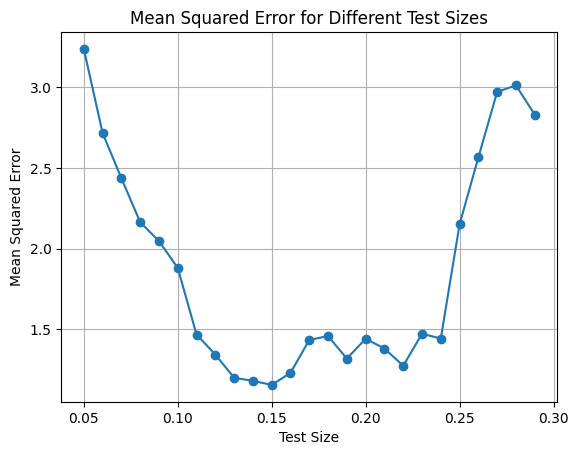

In [50]:
# Define the features and target variable
X = df_7.drop(columns=['Tonnage'])
y = df_7['Tonnage']

# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)

import matplotlib.pyplot as plt

test_sizes = []
mses = []

for i in range(5, 30):
    test_size = i / 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    test_sizes.append(test_size)
    mses.append(mse)

#plt.figure(figsize=(10, 5))
plt.plot(test_sizes, mses, marker='o')
plt.title('Mean Squared Error for Different Test Sizes')
plt.xlabel('Test Size')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()